## <b><div style='padding:30px;background-color:#001BC7;color:white;border-radius:80px;font-size:150%;text-align: center'>Median Weekly Earnings by Sex</div></b>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/median-weekly-earnings-by-sex/data.csv


## <b><div style='padding:15px;background-color:#001BC7;color:white;border-radius:40px;font-size:110%;text-align: center'>1  |  About Dataset</div></b>

**Dataset Overview**

This dataset provides a comprehensive overview of the U.S. workforce and their median weekly earnings over time, spanning from 2009 to 2021. The data is broken down by gender and includes both current and constant dollar values, providing insight into the economic trends affecting different segments of the workforce.

**Columns Description**

* Year: The year of the data point.
* Quarter: The quarter of the year (1-4) when the data was collected.
* Number of workers (in thousands) - Total: The total number of workers in the U.S. workforce, reported in thousands.
* Number of workers (in thousands) - Men: The number of male workers in the U.S. workforce, reported in thousands.
* Number of workers (in thousands) - Women: The number of female workers in the U.S. workforce, reported in thousands.
* Median weekly earnings (in current dollars) - Total: The median weekly earnings of all workers in the U.S. workforce, reported in current dollars.
* Median weekly earnings (in current dollars) - Men: The median weekly earnings of male workers in the U.S. workforce, reported in current dollars.
* Median weekly earnings (in current dollars) - Women: The median weekly earnings of female workers in the U.S. workforce, reported in current dollars.
* Median weekly earnings (in constant dollars) - Total: The median weekly earnings of all workers in the U.S. workforce, adjusted for inflation and reported in constant dollars.
* Median weekly earnings (in constant dollars) - Men: The median weekly earnings of male workers in the U.S. workforce, adjusted for inflation and reported in constant dollars.
* Median weekly earnings (in constant dollars) - Women: The median weekly earnings of female workers in the U.S. workforce, adjusted for inflation and reported in constant dollars.

## <b><div style='padding:15px;background-color:#001BC7;color:white;border-radius:40px;font-size:110%;text-align: center'>2  |  Importing Libraries</div></b>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import plotly.express as px
import plotly.graph_objects as go
import ipywidgets as widgets
from ipywidgets import interact, Dropdown, Output
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

## <b><div style='padding:15px;background-color:#001BC7;color:white;border-radius:40px;font-size:110%;text-align: center'>3  |  Downloading Dataset</div></b>

In [3]:
df = pd.read_csv('/kaggle/input/median-weekly-earnings-by-sex/data.csv')

In [4]:
# Check Dataset

print('### first 5 lines ###','\n')
df.head()

### first 5 lines ### 



,Year,Quarter,Number of workers (in thousands) - Total,Number of workers (in thousands) - Men,Number of workers (in thousands) - Women,Median weekly earnings (in current dollars) - Total,Median weekly earnings (in current dollars) - Men,Median weekly earnings (in current dollars) - Women,Median weekly earnings (in constant dollars) - Total,Median weekly earnings (in constant dollars) - Men,Median weekly earnings (in constant dollars) - Women
0,2009,4,"98,555","54,410","44,145",747,823,666,344,379,307
1,2010,1,"98,143","54,098","44,045",748,836,662,344,384,304
2,2010,2,"99,605","55,028","44,577",742,814,671,342,374,309
3,2010,3,"100,412","55,620","44,792",746,821,670,342,377,308
4,2010,4,"99,958","55,486","44,472",750,826,676,341,376,308


## <b><div style='padding:15px;background-color:#001BC7;color:white;border-radius:40px;font-size:110%;text-align: center'>4  |  Inspecting and Cleaning Dataframe Structure</div></b>

In [5]:
# Dataframe summary

def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)
    
summary(df)

data shape: (37, 11)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
Year,int64,0,0.0,0,10,37,2009.0,2018.0,2013.864865,2.709676,2009,2010,2010
Quarter,int64,0,0.0,0,4,37,1.0,4.0,2.540541,1.144906,4,1,2
Number of workers (in thousands) - Total,object,0,0.0,0,37,37,NaN,NaN,NaN,NaN,"98,555","98,143","99,605"
Number of workers (in thousands) - Men,object,0,0.0,0,37,37,NaN,NaN,NaN,NaN,"54,410","54,098","55,028"
Number of workers (in thousands) - Women,object,0,0.0,0,36,37,NaN,NaN,NaN,NaN,"44,145","44,045","44,577"
Median weekly earnings (in current dollars) - Total,int64,0,0.0,0,35,37,742.0,897.0,801.27027,46.594974,747,748,742
Median weekly earnings (in current dollars) - Men,int64,0,0.0,0,30,37,814.0,991.0,883.054054,49.195159,823,836,814
Median weekly earnings (in current dollars) - Women,int64,0,0.0,0,32,37,662.0,801.0,721.0,39.496835,666,662,671
Median weekly earnings (in constant dollars) - Total,int64,0,0.0,0,19,37,330.0,355.0,341.405405,7.181997,344,344,342
Median weekly earnings (in constant dollars) - Men,int64,0,0.0,0,21,37,363.0,392.0,376.351351,7.26948,379,384,374


<div class="alert alert-block alert-info" style="background-color:caf0f8;color:#2368e1;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> No missing, no dups date</div>

#### <b><span style='color:#DEB078'></span><span style='color:#2368e1'> We will only use the values ​​from the 'in constant dollars' columns.</span></b> 

In [6]:
# Deleting unnecessary columns in this study
df.drop(['Median weekly earnings (in current dollars) - Total',
       'Median weekly earnings (in current dollars) - Men',
       'Median weekly earnings (in current dollars) - Women'], axis=1, inplace=True)

In [7]:
# Rename the columns to make the names shorter.
df = df.rename({"Number of workers (in thousands) - Total":"workers_total",
                "Number of workers (in thousands) - Men":"workers_men",
                "Number of workers (in thousands) - Women":"workers_women", 
                "Median weekly earnings (in constant dollars) - Total":"weekly_earnings_total",
                "Median weekly earnings (in constant dollars) - Men":"weekly_earnings_men",
                "Median weekly earnings (in constant dollars) - Women":"weekly_earnings_women",
               }, axis='columns')


In [8]:
# Create a column that includes the year and quarter.
df['Date'] = (df['Year'] + df['Quarter']/4)

In [9]:
# Change the type of worker columns.
columns = ['workers_total', 'workers_men', 'workers_women'] 

df[columns] = df[columns].apply(lambda x: x.str.replace(',', '').astype('int'))

## <b><div style='padding:15px;background-color:#001BC7;color:white;border-radius:40px;font-size:110%;text-align: center'>5  |  EDA</div></b>

### <b><span style='color:#DEB078'>5.1 |</span><span style='color:#7A7A7A'> Number of workers (in thousands)</span></b>  

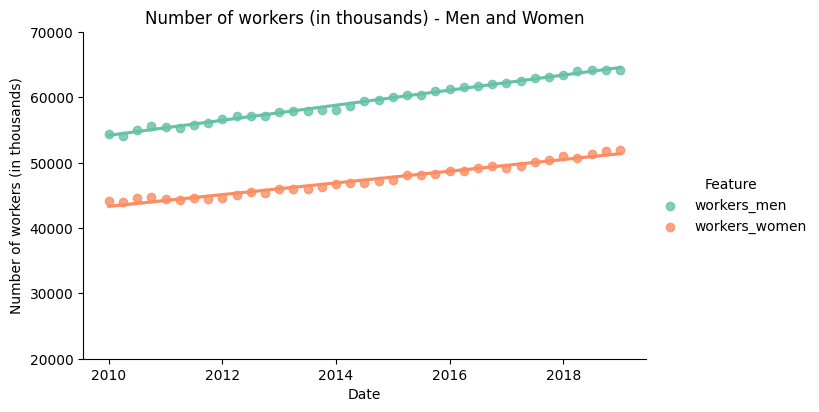

In [10]:
# View the evolution of men's and women's workers.
df_melted = df.melt(id_vars='Date', value_vars=['workers_men', 'workers_women'], 
                           var_name='Feature', value_name='Measurement')
sns.lmplot(x='Date', y='Measurement', hue='Feature', data=df_melted, palette='Set2', height = 4, aspect = 1.7)
plt.title("Number of workers (in thousands) - Men and Women")
plt.xlabel('Date')
plt.ylabel('Number of workers (in thousands)')
plt.ylim(20000, 70000)
plt.show()

<div class="alert alert-block alert-info" style="background-color:caf0f8;color:#2368e1;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> We can see that there is a tendency for the number of workers for both women and men to increase over time.</div>

In [11]:
# Let's create a column that represents the relationship between workers_women and workers_men.

df['workers_w_m'] = df['workers_women'] / df['workers_men'] * 100

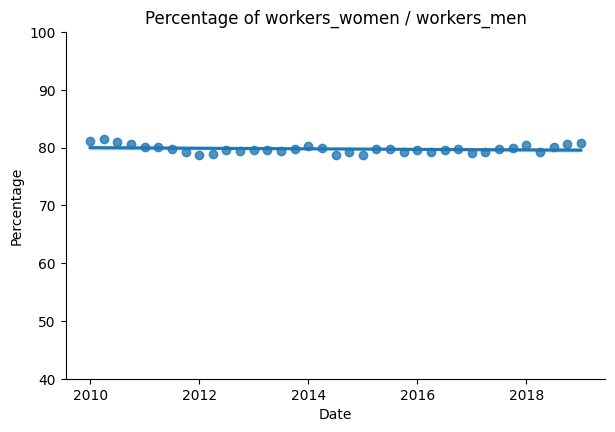

In [12]:
# Visualize the evolution of the relationship between women and men workers.
sns.lmplot(x='Date', y='workers_w_m', data=df, palette='Set2', height = 4.2, aspect = 1.5)
plt.title("Percentage of workers_women / workers_men")
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.ylim(40, 100)
plt.show()

In [13]:
df['workers_w_m'].describe()

count    37.000000
mean     79.760729
std       0.676174
min      78.693678
25%      79.273798
50%      79.705873
75%      80.114571
max      81.417058
Name: workers_w_m, dtype: float64

<div class="alert alert-block alert-info" style="background-color:caf0f8;color:#2368e1;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> We can see that the percentage of women in relation to men remains practically stable over time.</div>

### <b><span style='color:#DEB078'>5.2 |</span><span style='color:#7A7A7A'> Median weekly earnings (in constant dollars)</span></b>  

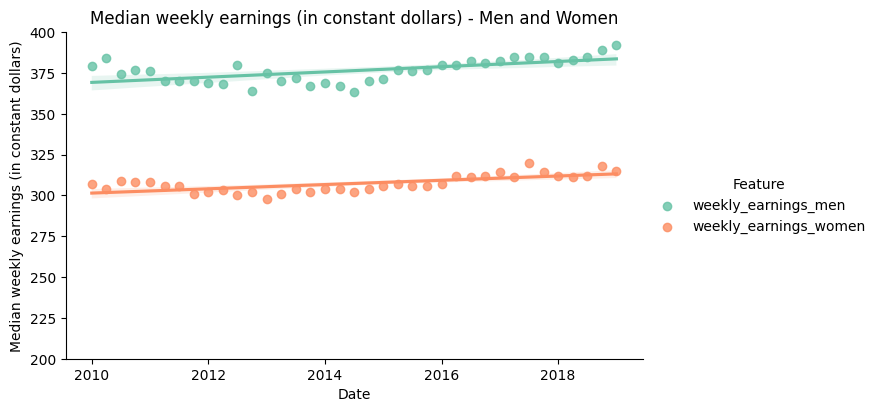

In [14]:
# View the evolution of men's and women's earnings.
df_melted = df.melt(id_vars='Date', value_vars=['weekly_earnings_men', 'weekly_earnings_women'], 
                           var_name='Feature', value_name='Measurement')
sns.lmplot(x='Date', y='Measurement', hue='Feature', data=df_melted, palette='Set2', height = 4, aspect = 1.7)
plt.title("Median weekly earnings (in constant dollars) - Men and Women")
plt.xlabel('Date')
plt.ylabel('Median weekly earnings (in constant dollars)')
plt.ylim(200, 400)
plt.show()

<div class="alert alert-block alert-info" style="background-color:caf0f8;color:#2368e1;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> We can see that there is a tendency for earnings for both women and men to increase over time.</div>

In [15]:
# Let's create a column that represents the relationship between weekly_earnings_women and weekly_earnings_men.

df['weekly_earnings_w_m'] = df['weekly_earnings_women'] / df['weekly_earnings_men'] * 100

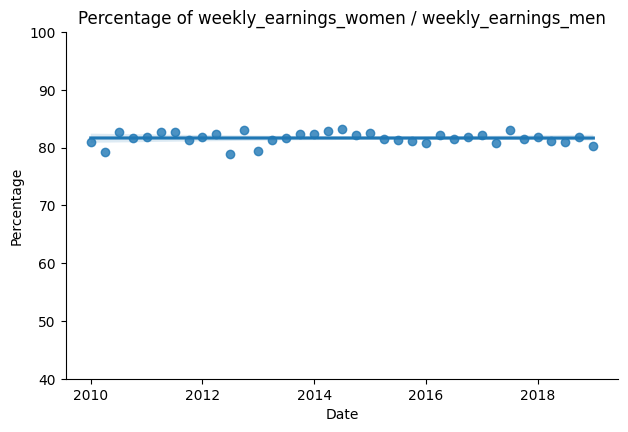

In [16]:
# View the evolution of weekly_earnings_women / weekly_earnings_men.
sns.lmplot(x='Date', y='weekly_earnings_w_m', data=df, palette='Set2', height = 4.2, aspect = 1.5)
plt.title("Percentage of weekly_earnings_women / weekly_earnings_men")
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.ylim(40, 100)
plt.show()

In [17]:
df['weekly_earnings_w_m'].describe()

count    37.000000
mean     81.654204
std       1.013098
min      78.947368
25%      81.201044
50%      81.748072
75%      82.336957
max      83.195592
Name: weekly_earnings_w_m, dtype: float64

<div class="alert alert-block alert-info" style="background-color:caf0f8;color:#2368e1;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> We can see that the percentage of earnings between women and men remains practically stable over time..</div>

## <b><span style='color:#DEB078'></span><span style='color:#2368e1'> Summary:</span></b>

#### <b><span style='color:#DEB078'></span><span style='color:#2368e1'>We can conclude that there is an increase in the number of workers and earnings over time, both for women and men.</span></b>

#### <b><span style='color:#DEB078'></span><span style='color:#2368e1'>However, the relationship between men and women, in terms of the number of workers and earnings, has remained practically the same over the years.</span></b>

## <b><div style='padding:15px;background-color:#001BC7;color:white;border-radius:40px;font-size:110%;text-align: center'>If you liked it, please upvote. Thank you very much.</div></b>